# Load Dataset

In [ ]:
!pip install kaggle

Upload kaggle API key (kaggle.json)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                          title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance         Student Habits vs Academic Performance                    19512  2025-04-12 10:49:08.663000          20660        348  1.0              
adilshamim8/cost-of-international-education                  Cost of International Education                           18950  2025-05-07 15:41:53.213000           3199         50  1.0              
fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid      Heart Attack Dataset                                      16250  2025-04-30 21:58:22.740000           3891         68  1.0              
ivankmk/th

In [4]:
!kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2023

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
License(s): other
 88% 126M/143M [00:00<00:00, 1.32GB/s]
100% 143M/143M [00:00<00:00, 1.26GB/s]


In [5]:
!unzip credit-card-fraud-detection-dataset-2023.zip

Archive:  credit-card-fraud-detection-dataset-2023.zip
  inflating: creditcard_2023.csv     


Load dataset

In [2]:
import pandas as pd

df = pd.read_csv('creditcard_2023.csv')
print(df.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

Check for null values

In [ ]:
print(df.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
df_sample = df.sample(5)
print(df_sample.transpose())

              85332         71547         76555          113843         436319
id      85332.000000  71547.000000  76555.000000  113843.000000  436319.000000
V1          0.034575     -1.379785     -1.252939       0.848236      -0.495302
V2         -0.124877     -0.596876      0.347918      -0.501645       0.405231
V3          1.196220     -0.435291     -1.004393       1.284738      -0.624011
V4         -0.713680     -0.039676      1.246350      -0.170520       0.301423
V5          0.429256     -0.358511     -1.075536       0.062903      -0.294418
V6          0.470665      0.864059      0.281081       1.049778       0.219571
V7          0.621762      0.945468     -1.186226       0.192181      -0.190732
V8         -0.095793     -0.083073      0.126944      -0.035461       0.246730
V9          0.164114      2.376408     -1.377289       0.884457      -0.215019
V10         0.449337      3.544615     -1.158819       0.545253      -0.761832
V11         0.050023      0.129708      1.202735    

## Data visualization

In [ ]:
print(df['Class'].value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


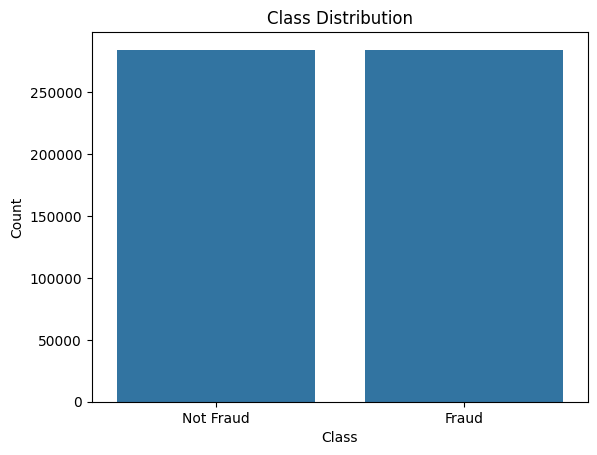

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_temp = df.copy()  # Avoid modifying the original DataFrame
df_temp['Class_Label'] = df_temp['Class'].map({0: 'Not Fraud', 1: 'Fraud'})

# Plot the countplot using the temporary column
sns.countplot(x='Class_Label', data=df_temp)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

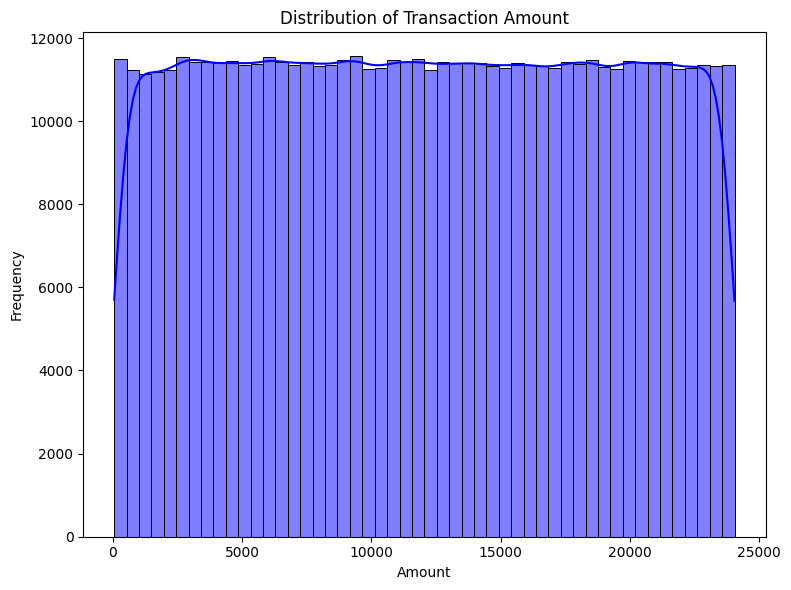

In [ ]:
# Plot distributions of 'Amount' and 'Time'
plt.figure(figsize=(15, 6))

# Amount distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, color='blue', kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-10-a7564f6dc2a6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette='Set2')


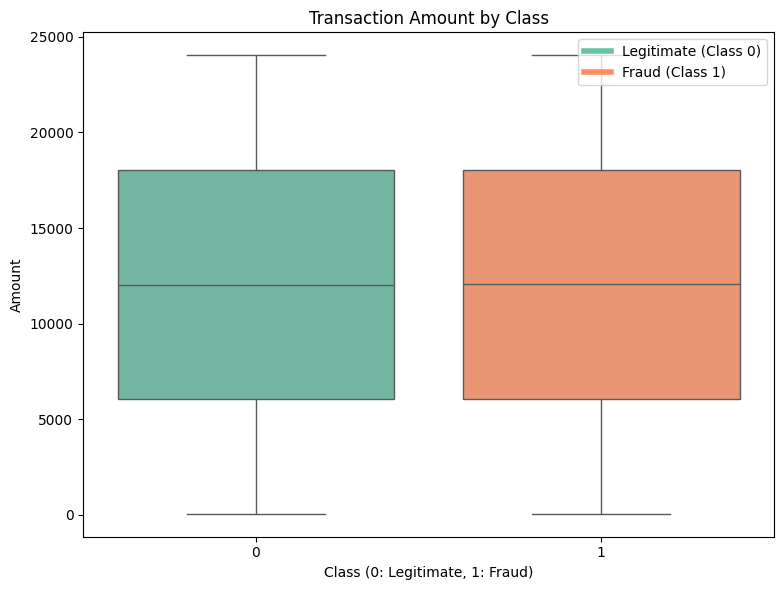

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate fraud and legitimate transactions
fraud = df[df['Class'] == 1]
legitimate = df[df['Class'] == 0]

# Create the figure and subplots
plt.figure(figsize=(15, 6))

# Amount comparison
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', data=df, palette='Set2')

# Add a legend manually
from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color=sns.color_palette('Set2')[0], lw=4, label='Legitimate (Class 0)'),
    Line2D([0], [0], color=sns.color_palette('Set2')[1], lw=4, label='Fraud (Class 1)')
]
plt.legend(handles=custom_lines, loc='upper right')

# Add titles and labels
plt.title('Transaction Amount by Class')
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Amount')

# Show the plot
plt.tight_layout()
plt.show()

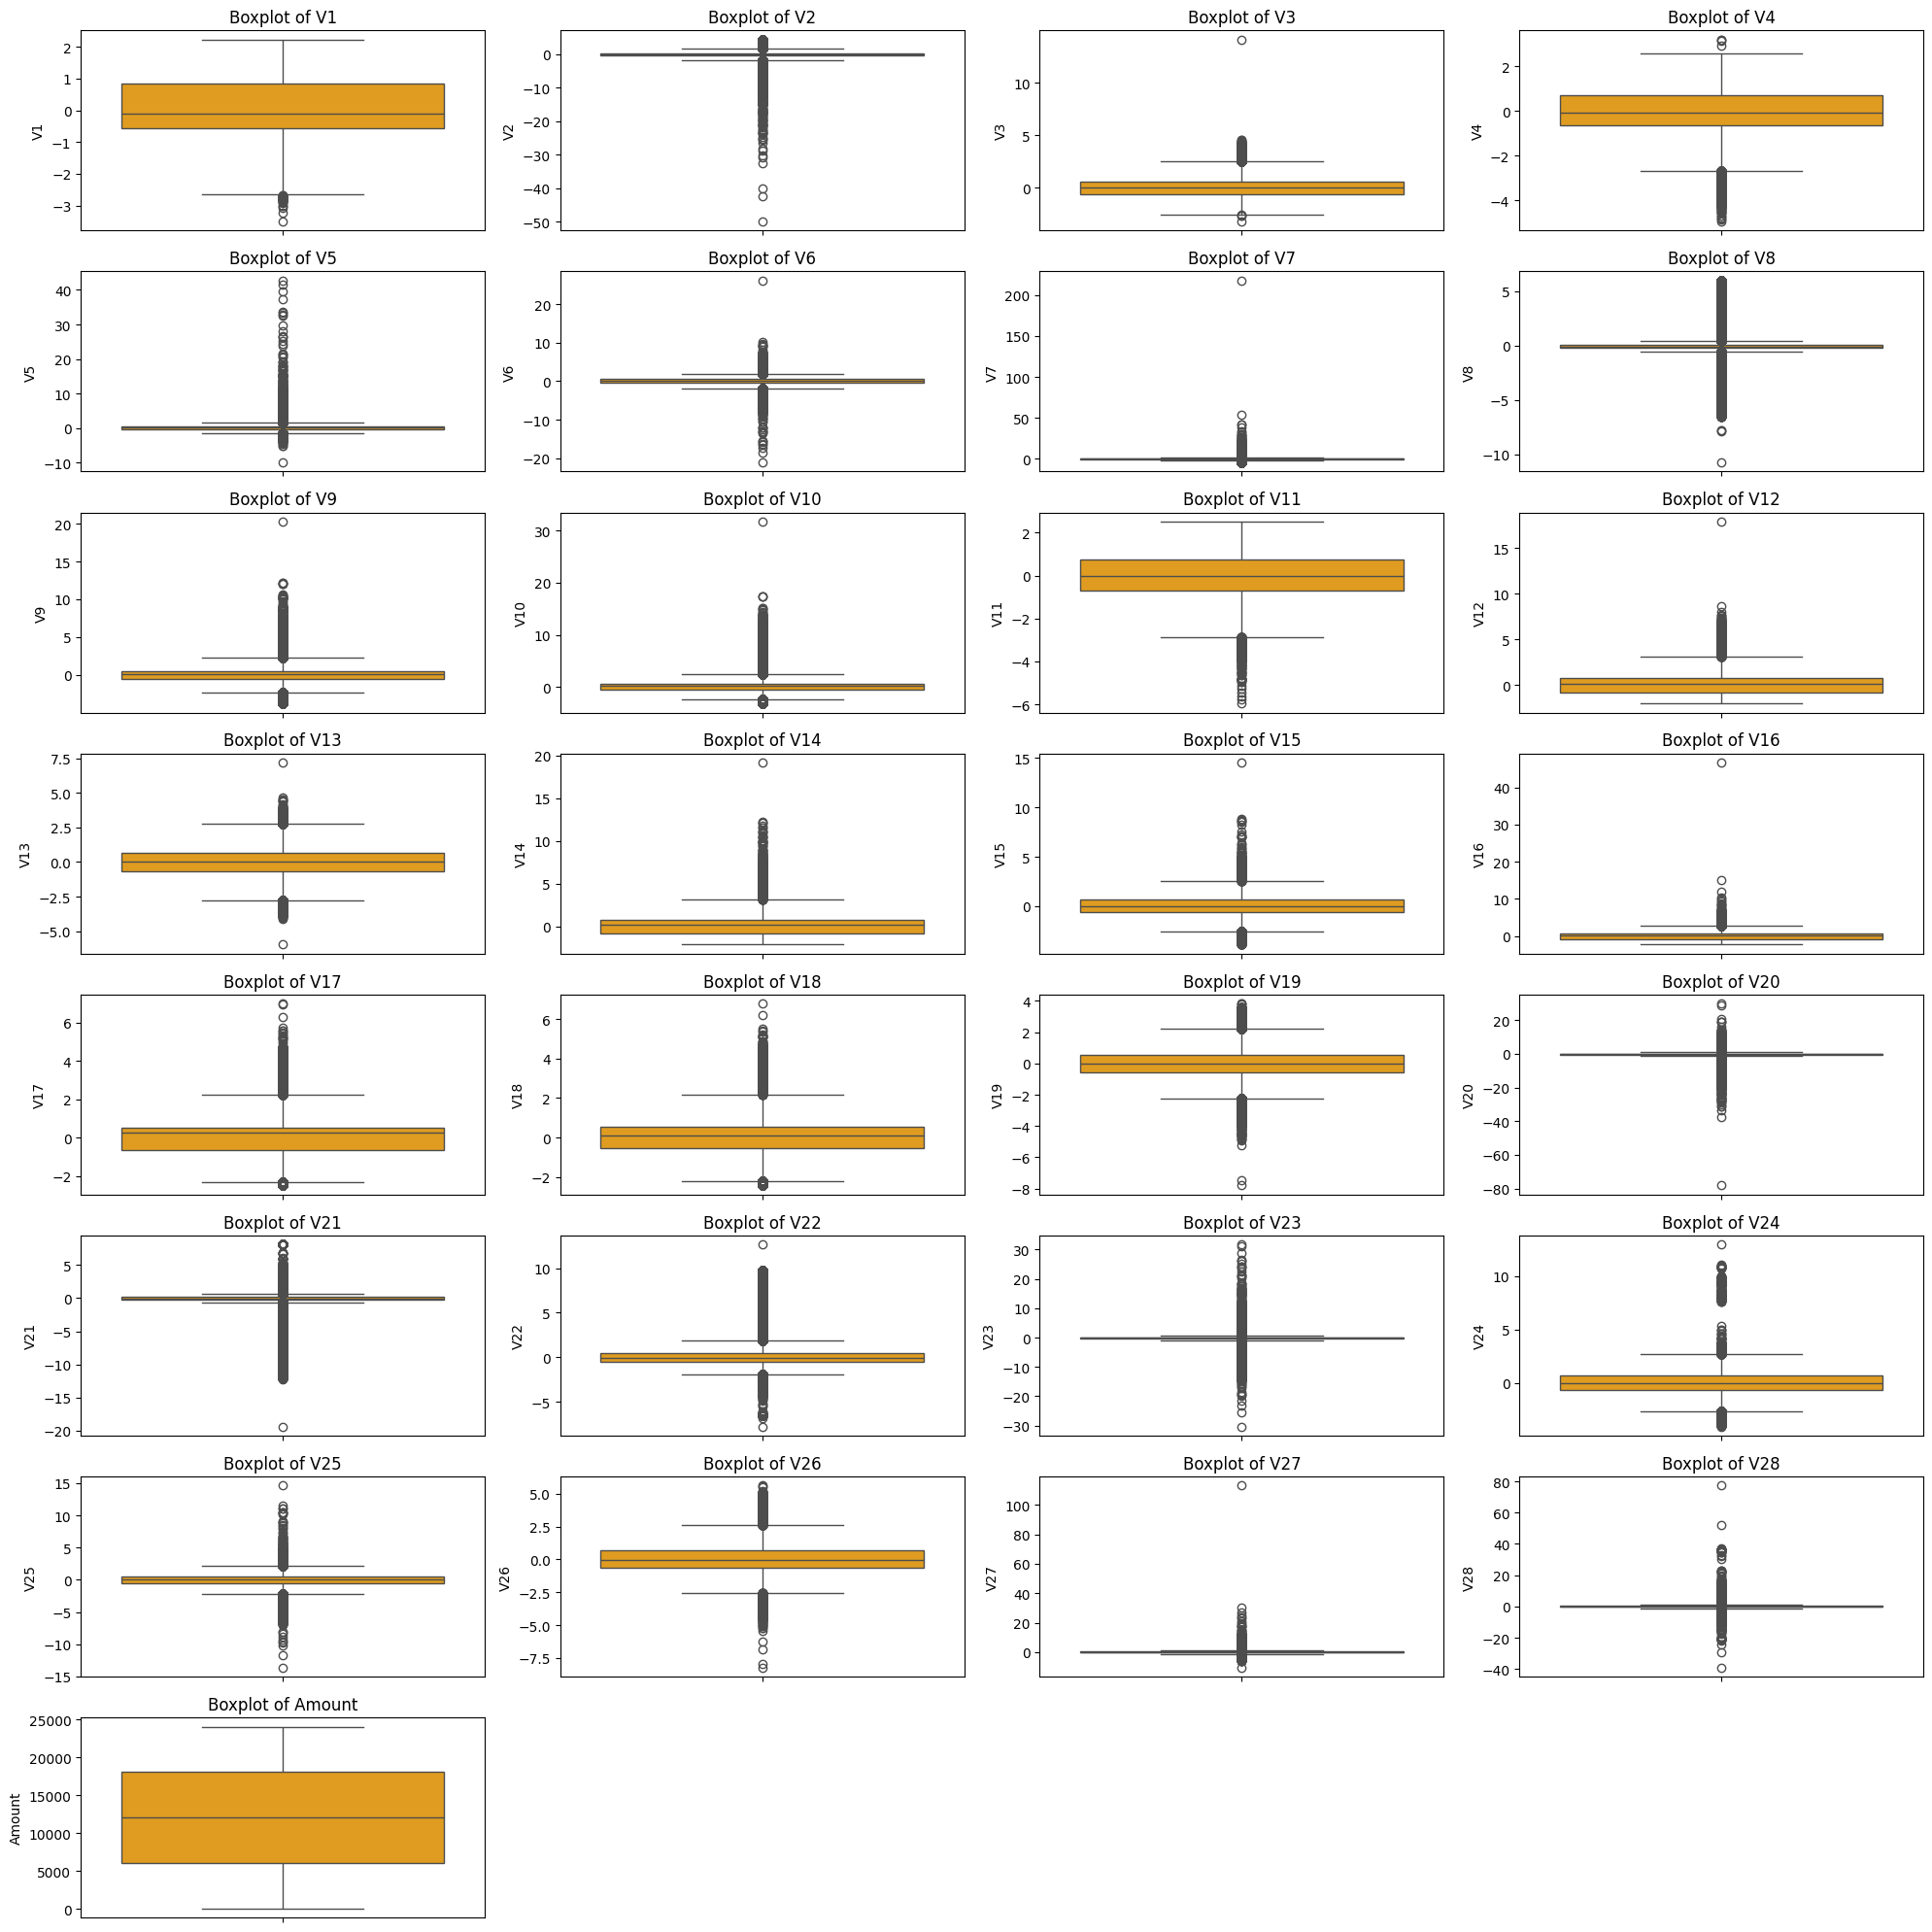

In [ ]:
# Visualize outliers for V1-V28
plt.figure(figsize=(20, 20))  # Increase figure size to fit more rows
for i, col in enumerate(df.columns[1:-1], 1):  # Loop through all features except 'Class'
    plt.subplot(8, 4, i)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Data PreProcessing

In [ ]:
df.sample(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
283612,283612,1.272107,-0.890026,0.132132,-0.625740,0.111466,0.676485,0.324893,-0.139952,1.103358,...,0.047872,0.633758,-0.123117,0.619179,-0.463323,0.109519,-0.280891,-0.111192,18912.12,0
512814,512814,-1.033883,1.145502,-1.287853,1.164801,-1.572276,-0.990003,-1.304238,0.878441,-0.837500,...,0.648023,0.917291,0.438147,0.711665,-0.339865,0.845818,-0.651813,0.550797,13029.57,1
313006,313006,-0.230890,0.552101,-0.919552,0.467090,-0.143702,-0.690700,-0.160847,0.183060,-0.618243,...,0.302949,1.017871,0.099507,0.615290,-1.127089,-0.720738,0.433259,0.701341,11132.94,1
308962,308962,-1.184445,0.350959,-1.038638,0.983318,-0.634178,-0.883479,-1.121023,0.220638,-1.207732,...,-0.007086,0.132774,-0.376902,-0.773295,-0.235103,0.520838,1.504091,0.299677,6888.83,1
396186,396186,-0.498099,-0.559449,-0.428429,0.690626,-0.070565,-0.556188,-0.240572,0.001377,-0.701190,...,0.305291,-0.278920,0.136396,-0.581978,0.800143,1.198199,0.548274,1.056987,17056.36,1


In [3]:
df = df.drop(columns=['id'])  # Delete irrelevant column
df = df.dropna() # Delete rows with missing values

Standarize: mean of 0 and a standard deviation of 1

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Class', axis=1)) #Standarization
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['Class']

Data splitting

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Oversampling (create syntetic samples for class imbalance)

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train models

## With SkLearn

Define models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

Train models with .fit()

In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Train each model
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_res, y_train_res)

    # Measure inference time
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    inference_time = end_time - start_time
    average_inference_time = inference_time / len(X_test)  # Average time per sample

    # Calculate metrics (Performance)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Results for {name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print(f"  Inference Time (Total): {inference_time:.6f} seconds")
    print(f"  Inference Time (Per Sample): {average_inference_time:.6f} seconds\n")

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Inference Time (Total)': inference_time,
        'Inference Time (Per Sample)': average_inference_time
    }

Training Logistic Regression...
Results for Logistic Regression:
  Accuracy: 0.9649
  Precision: 0.9770
  Recall: 0.9523
  F1-Score: 0.9645
  ROC-AUC: 0.9649
  Inference Time (Total): 0.013712 seconds
  Inference Time (Per Sample): 0.000000 seconds

Training Random Forest...
Results for Random Forest:
  Accuracy: 0.9998
  Precision: 0.9997
  Recall: 1.0000
  F1-Score: 0.9998
  ROC-AUC: 0.9998
  Inference Time (Total): 1.034978 seconds
  Inference Time (Per Sample): 0.000009 seconds

Training SVM...
Results for SVM:
  Accuracy: 0.9971
  Precision: 0.9963
  Recall: 0.9979
  F1-Score: 0.9971
  ROC-AUC: 0.9971
  Inference Time (Total): 104.024427 seconds
  Inference Time (Per Sample): 0.000915 seconds



In [ ]:
print("\nFinal Results Summary:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        if "Time" in metric:
            print(f"  {metric}: {value:.6f} seconds")  # Format time to 6 decimal places
        else:
            print(f"  {metric}: {value:.4f}")


Final Results Summary:

Logistic Regression:
  Accuracy: 0.9649
  Precision: 0.9770
  Recall: 0.9523
  F1-Score: 0.9645
  ROC-AUC: 0.9649
  Inference Time (Total): 0.013712 seconds
  Inference Time (Per Sample): 0.000000 seconds

Random Forest:
  Accuracy: 0.9998
  Precision: 0.9997
  Recall: 1.0000
  F1-Score: 0.9998
  ROC-AUC: 0.9998
  Inference Time (Total): 1.034978 seconds
  Inference Time (Per Sample): 0.000009 seconds

SVM:
  Accuracy: 0.9971
  Precision: 0.9963
  Recall: 0.9979
  F1-Score: 0.9971
  ROC-AUC: 0.9971
  Inference Time (Total): 104.024427 seconds
  Inference Time (Per Sample): 0.000915 seconds


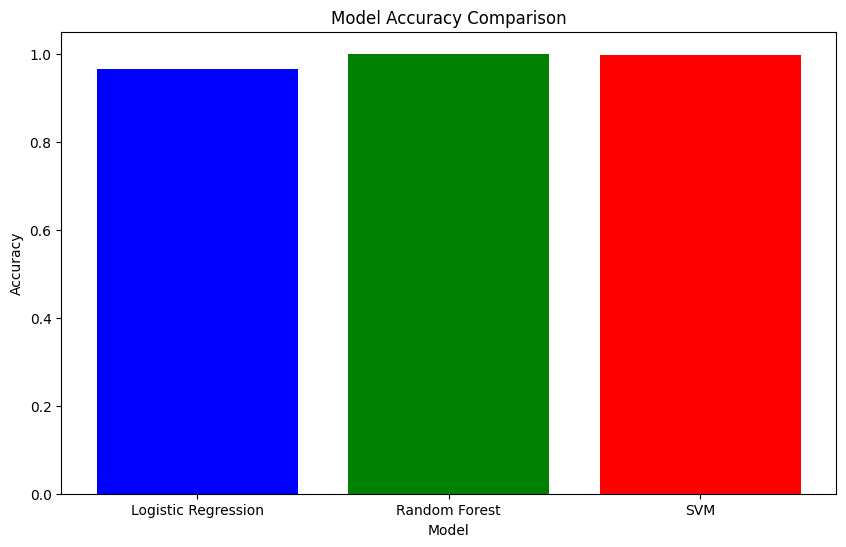

In [ ]:
# Visualize accuracy comparison
plt.figure(figsize=(10, 6))
accuracies = [metrics['Accuracy'] for metrics in results.values()]
model_names = list(results.keys())
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

## Logistic Regression with pytorch

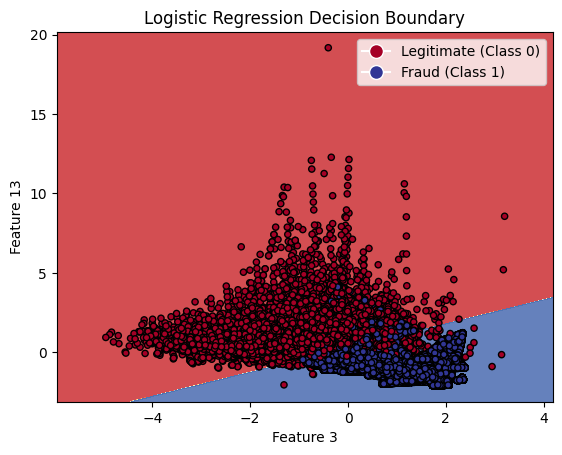

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.lines import Line2D  # For custom legend

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
coefficients = log_reg.coef_[0]  # Shape: (n_features,)

# 2 top features
top_feature_indices = np.argsort(np.abs(coefficients))[::-1]  # Sort by absolute value
top_features = top_feature_indices[:2]

X_train_numpy = X_train.to_numpy()
X_test_numpy = X_test.to_numpy()
X_train_reduced = X_train_numpy[:, top_features]
X_test_reduced = X_test_numpy[:, top_features]

# Retrain Logistic Regression on reduced dataset
log_reg.fit(X_train_reduced, y_train)

# Plot decision boundary
def plot_decision_boundary(model, X, y, title, feature_names):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=plt.cm.RdYlBu)

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Legitimate (Class 0)', markerfacecolor=plt.cm.RdYlBu(0), markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Fraud (Class 1)', markerfacecolor=plt.cm.RdYlBu(255), markersize=10)
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.title(title)
    plt.xlabel(f"Feature {feature_names[0]}")
    plt.ylabel(f"Feature {feature_names[1]}")
    plt.show()

plot_decision_boundary(log_reg, X_train_reduced, y_train, "Logistic Regression Decision Boundary", top_features)

Training Logistic Regression with PyTorch...
Epoch [10/100], Loss: 0.6583
Epoch [20/100], Loss: 0.6159
Epoch [30/100], Loss: 0.5787
Epoch [40/100], Loss: 0.5466
Epoch [50/100], Loss: 0.5190
Epoch [60/100], Loss: 0.4952
Epoch [70/100], Loss: 0.4745
Epoch [80/100], Loss: 0.4565
Epoch [90/100], Loss: 0.4406
Epoch [100/100], Loss: 0.4265

Evaluation Metrics:
Accuracy: 0.8878
Precision: 0.9685
Recall: 0.8017
F1-Score: 0.8772
ROC-AUC: 0.9076


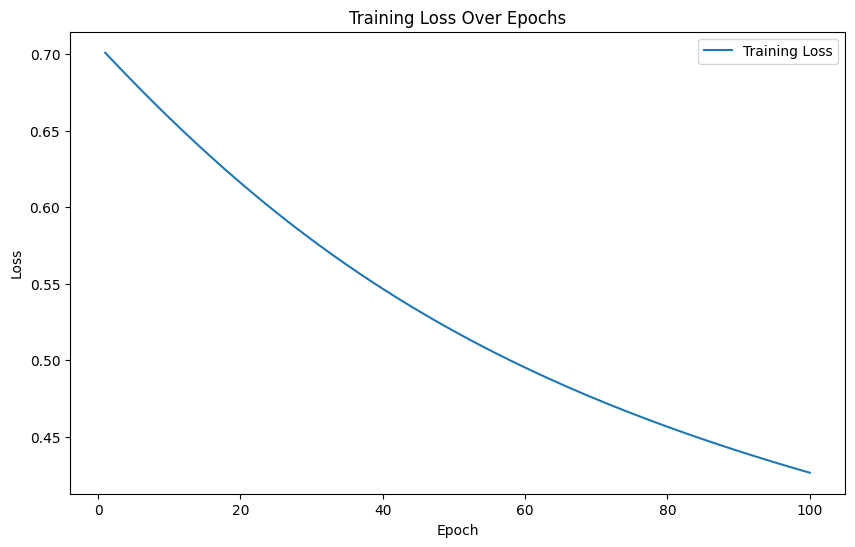

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_res.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_res.values, dtype=torch.float32).view(-1, 1)  # Reshape to (n_samples, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Step 2: Define the Logistic Regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Single output node for binary classification

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Apply sigmoid activation

# Initialize the model
input_dim = X_train_tensor.shape[1]  # Number of features
model = LogisticRegressionModel(input_dim)

# Step 3: Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# Step 4: Train the model
epochs = 100  # Number of training iterations
losses = []  # To store loss values for plotting

print("Training Logistic Regression with PyTorch...")
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Store loss for plotting
    losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Step 5: Evaluate the model
with torch.no_grad():  # Disable gradient computation for evaluation
    # Predict on test data
    y_pred_prob = model(X_test_tensor).numpy()  # Get probabilities
    y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

    # Calculate metrics
    accuracy = accuracy_score(y_test_tensor.numpy(), y_pred)
    precision = precision_score(y_test_tensor.numpy(), y_pred)
    recall = recall_score(y_test_tensor.numpy(), y_pred)
    f1 = f1_score(y_test_tensor.numpy(), y_pred)
    roc_auc = roc_auc_score(y_test_tensor.numpy(), y_pred_prob)

    print("\nEvaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

# Step 6: Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Trying with other variations of the hyperparameters

In [ ]:
!pip install ptflops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli


Training with configuration: Adam lr=0.001

Results for Adam lr=0.001:
Accuracy: 0.9112
Precision: 0.9961
Recall: 0.8256
F1-Score: 0.9028
ROC-AUC: 0.9636

Training with configuration: Adam lr=0.01

Results for Adam lr=0.01:
Accuracy: 0.9515
Precision: 0.9861
Recall: 0.9159
F1-Score: 0.9497
ROC-AUC: 0.9906

Training with configuration: Adam with Weight Decay

Results for Adam with Weight Decay:
Accuracy: 0.9097
Precision: 0.9975
Recall: 0.8215
F1-Score: 0.9010
ROC-AUC: 0.9646

Training with configuration: SGD lr=0.001

Results for SGD lr=0.001:
Accuracy: 0.9109
Precision: 0.9992
Recall: 0.8225
F1-Score: 0.9023
ROC-AUC: 0.9796

Training with configuration: SGD lr=0.01

Results for SGD lr=0.01:
Accuracy: 0.9481
Precision: 0.9873
Recall: 0.9079
F1-Score: 0.9459
ROC-AUC: 0.9897

Training with configuration: SGD lr=0.05

Results for SGD lr=0.05:
Accuracy: 0.9567
Precision: 0.9831
Recall: 0.9295
F1-Score: 0.9555
ROC-AUC: 0.9916

Training with configuration: SGD lr=0.1

Results for SGD lr=0.1

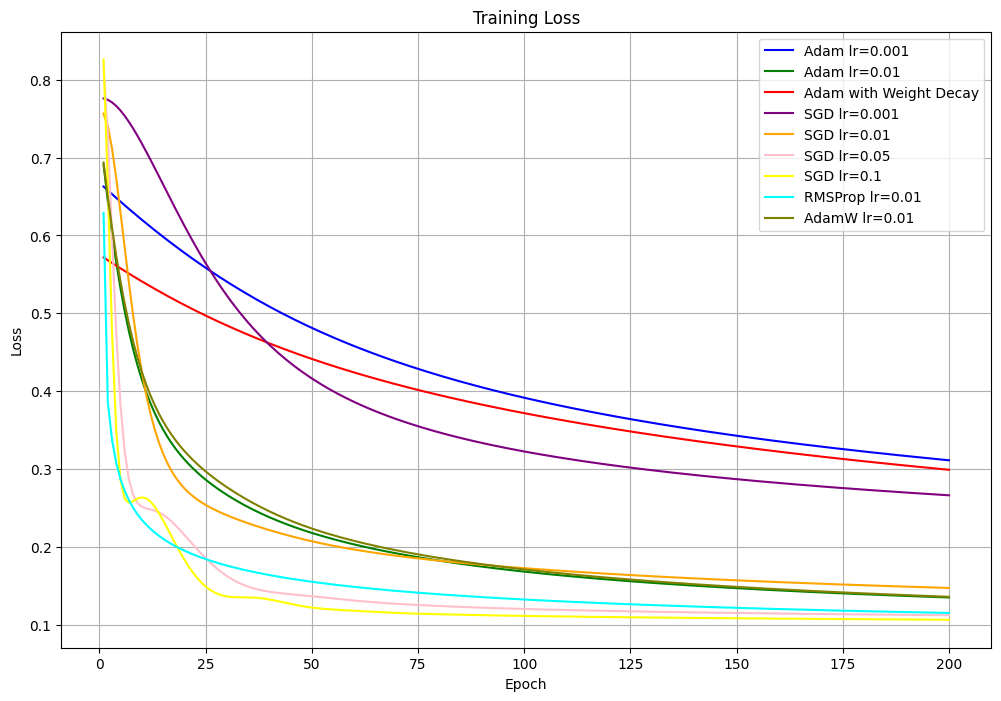

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# from ptflops import get_model_complexity_info
X_train_tensor = torch.tensor(X_train_res.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_res.values, dtype=torch.float32).view(-1, 1)  # Reshape to (n_samples, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

def train_and_evaluate(config, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor):
    # Initialize model
    model = LogisticRegressionModel(input_dim=X_train_tensor.shape[1])
    # MACs
    # macs, params = get_model_complexity_info(model, (1, X_train_tensor.shape[1]), as_strings=True, print_per_layer_stat=False)
    # print(f"\nMACs for {config['name']}: {macs}, Params: {params}")

    # loss and optimizer
    criterion = nn.BCELoss()
    if config['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=config['lr'], weight_decay=config['weight_decay'])
    elif config['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=config['lr'], momentum=0.9, weight_decay=config['weight_decay'])
    elif config['optimizer'] == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=config['lr'], weight_decay=config['weight_decay'])
    elif config['optimizer'] == 'AdamW':
        optimizer = optim.AdamW(model.parameters(), lr=config['lr'], weight_decay=config['weight_decay'])


    # Train the model
    losses = []
    for epoch in range(config['epochs']):
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    # Evaluate the model
    with torch.no_grad():
        y_pred_prob = model(X_test_tensor).numpy()
        y_pred = (y_pred_prob > 0.5).astype(int)

        accuracy = accuracy_score(y_test_tensor.numpy(), y_pred)
        precision = precision_score(y_test_tensor.numpy(), y_pred)
        recall = recall_score(y_test_tensor.numpy(), y_pred)
        f1 = f1_score(y_test_tensor.numpy(), y_pred)
        roc_auc = roc_auc_score(y_test_tensor.numpy(), y_pred_prob)

    # Print results
    print(f"\nResults for {config['name']}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    return losses

# hyperparameter variations
hyperparameter_configs = [
    {
        'name': 'Adam lr=0.001',
        'optimizer': 'Adam',
        'lr': 0.001,
        'weight_decay': 0.0,
        'epochs': 200
    },
    {
        'name': 'Adam lr=0.01',
        'optimizer': 'Adam',
        'lr': 0.01,
        'weight_decay': 0.0,
        'epochs': 200
    },
    {
        'name': 'Adam with Weight Decay',
        'optimizer': 'Adam',
        'lr': 0.001,
        'weight_decay': 0.01,
        'epochs': 200
    },
    {
        'name': 'SGD lr=0.001',
        'optimizer': 'SGD',
        'lr': 0.001,
        'weight_decay': 0.0,
        'epochs': 200
    },
    {
        'name': 'SGD lr=0.01',
        'optimizer': 'SGD',
        'lr': 0.01,
        'weight_decay': 0.0,
        'epochs': 200
    },
    {
        'name': 'SGD lr=0.05',
        'optimizer': 'SGD',
        'lr': 0.05,
        'weight_decay': 0.0,
        'epochs': 200
    },
    {
        'name': 'SGD lr=0.1',
        'optimizer': 'SGD',
        'lr': 0.1,
        'weight_decay': 0.0,
        'epochs': 200
    },
    {
        'name': 'RMSProp lr=0.01',
        'optimizer': 'RMSprop',
        'lr': 0.01,
        'weight_decay': 0.0,
        'epochs': 200
    },
    {
        'name': 'AdamW lr=0.01',
        'optimizer': 'AdamW',
        'lr': 0.01,
        'weight_decay': 0.0,
        'epochs': 200
    },

]

all_losses = []
config_names = []
# Train and evaluate each one
for config in hyperparameter_configs:
    print(f"\nTraining with configuration: {config['name']}")
    losses = train_and_evaluate(config, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)
    all_losses.append(losses)
    config_names.append(config['name'])

    # Plot the loss curve
    # plt.figure(figsize=(10, 6))
    # plt.plot(range(1, config['epochs'] + 1), losses, label=f"{config['name']} Loss")
    # plt.title(f"Training Loss for {config['name']}")
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.show()

# Plot all loss curves
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'yellow', 'cyan', 'olive']

for i, losses in enumerate(all_losses):
    epochs = range(1, len(losses) + 1)
    plt.plot(epochs, losses, label=config_names[i], color=colors[i])

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest

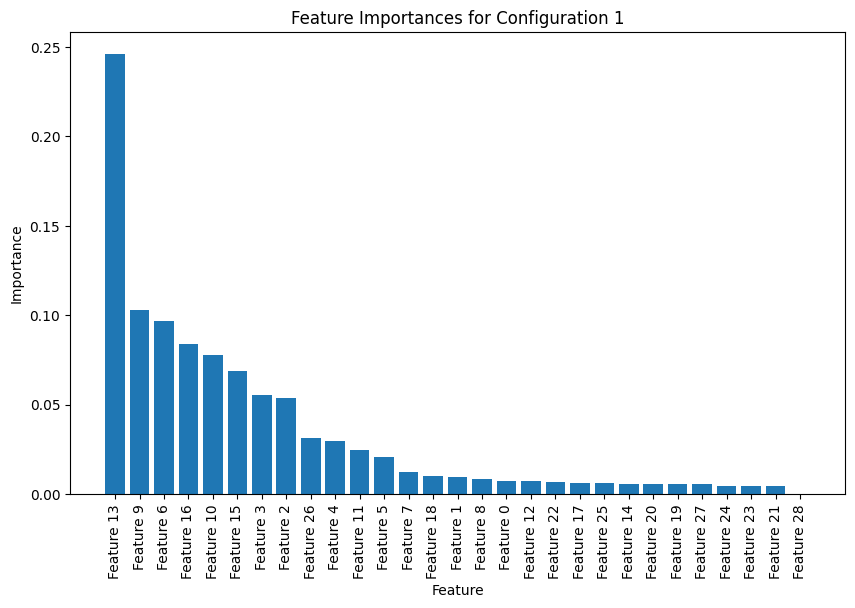

Configuration 1: Accuracy = 0.9998, Params = {'n_estimators': 10, 'max_depth': None, 'min_samples_split': 2, 'random_state': 42}


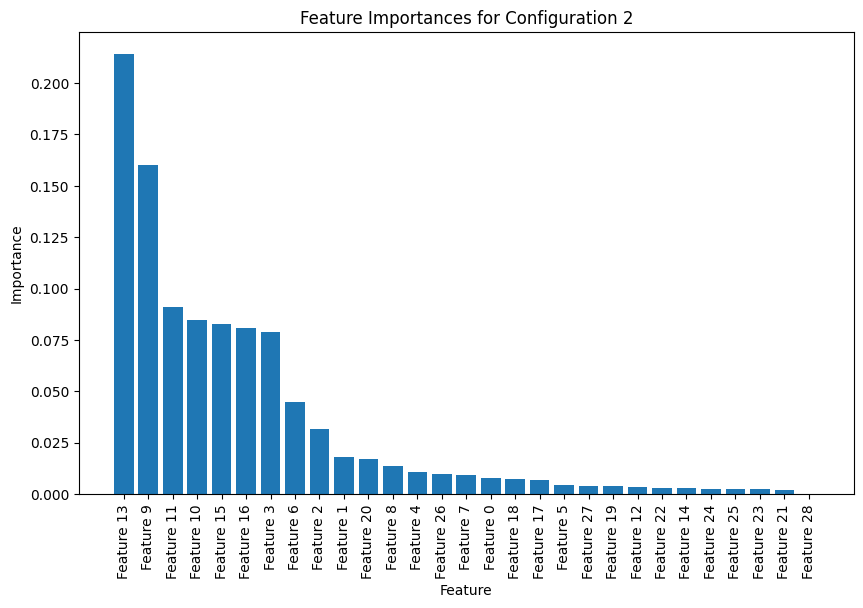

Configuration 2: Accuracy = 0.9864, Params = {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5, 'random_state': 42}


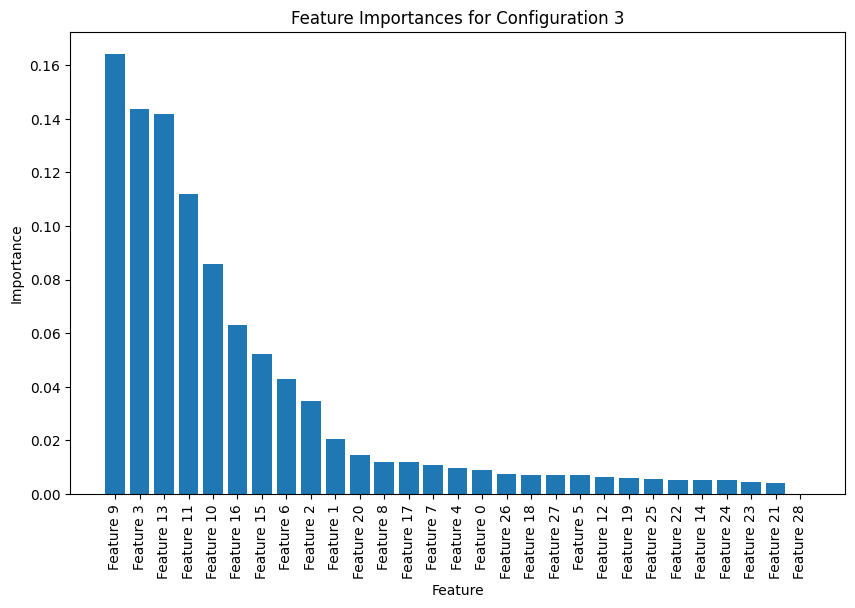

Configuration 3: Accuracy = 0.9998, Params = {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 10, 'random_state': 42}


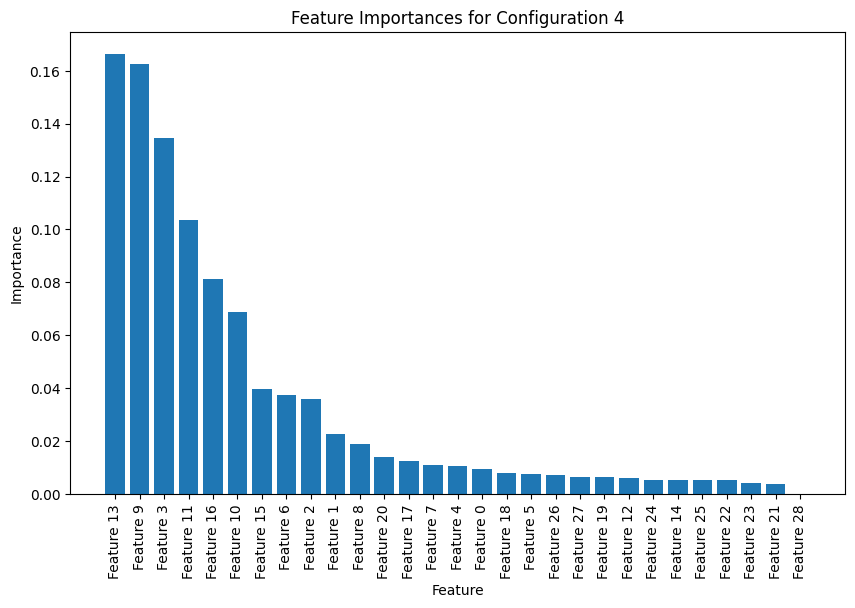

Configuration 4: Accuracy = 0.9998, Params = {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 20, 'random_state': 42}


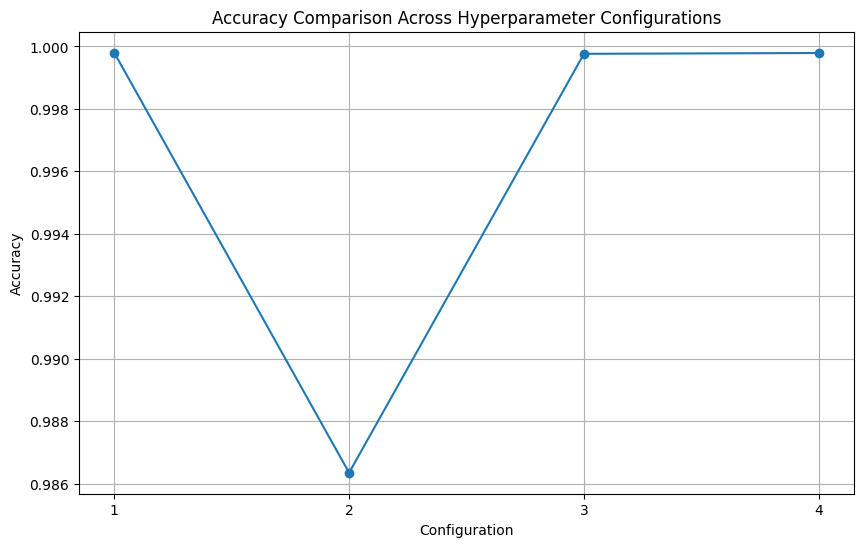

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define different hyperparameter variations
hyperparameter_configs = [
    {"n_estimators": 10, "max_depth": None, "min_samples_split": 2, "random_state": 42},
    {"n_estimators": 50, "max_depth": 10, "min_samples_split": 5, "random_state": 42},
    {"n_estimators": 100, "max_depth": 20, "min_samples_split": 10, "random_state": 42},
    {"n_estimators": 200, "max_depth": 30, "min_samples_split": 20, "random_state": 42},
]
accuracies = []
# Train and evaluate each configuration
for i, config in enumerate(hyperparameter_configs):
    model = RandomForestClassifier(**config)
    model.fit(X_train, y_train)

    # Extract feature importances
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances for Configuration {i+1}")
    plt.bar(range(X_train.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_train.shape[1]), [f"Feature {i}" for i in indices], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.show()

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Configuration {i+1}: Accuracy = {accuracy:.4f}, Params = {config}")

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(hyperparameter_configs) + 1), accuracies, marker='o')
plt.title("Accuracy Comparison Across Hyperparameter Configurations")
plt.xlabel("Configuration")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(hyperparameter_configs) + 1))
plt.grid(True)
plt.show()


In [ ]:
accuracies

[0.9997977595272849,
 0.9863531646237448,
 0.9997625872711605,
 0.9997889664632538]

Configuration 1: Accuracy = 0.9512, Params = {'n_estimators': 10, 'max_depth': None, 'min_samples_split': 2, 'random_state': 42}
Top 2 Features: [13  9]


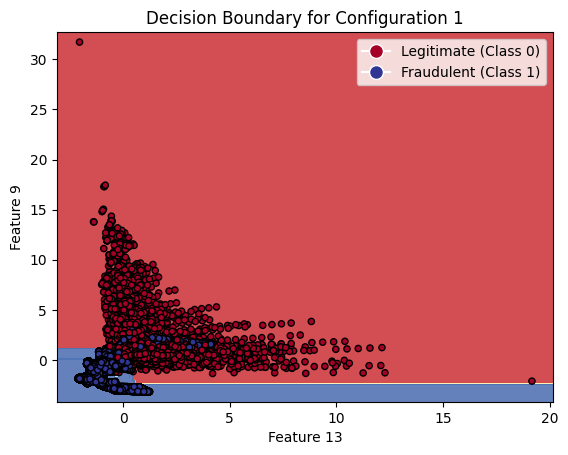

Configuration 2: Accuracy = 0.9464, Params = {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5, 'random_state': 42}
Top 2 Features: [13  9]


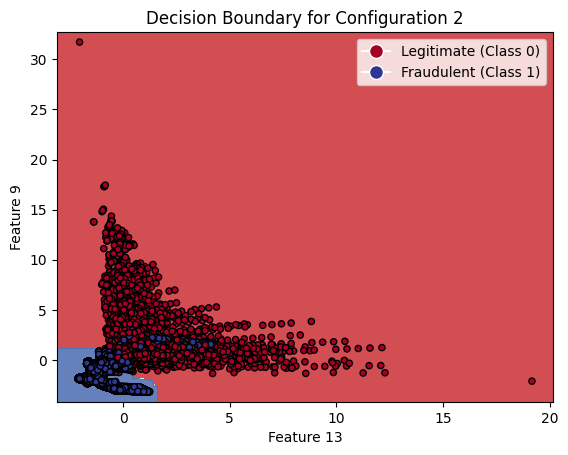

Configuration 3: Accuracy = 0.9555, Params = {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 10, 'random_state': 42}
Top 2 Features: [9 3]


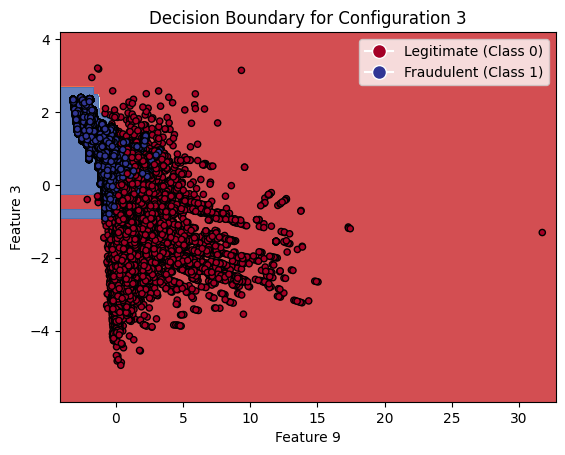

Configuration 4: Accuracy = 0.9518, Params = {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 20, 'random_state': 42}
Top 2 Features: [13  9]


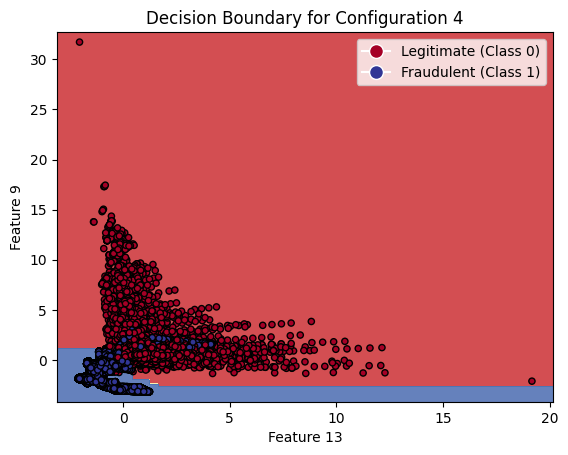

In [ ]:
from matplotlib.lines import Line2D
def plot_decision_boundary(model, X, y, title, top_features):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=plt.cm.RdYlBu)

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Legitimate (Class 0)',
               markerfacecolor=plt.cm.RdYlBu(0), markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Fraudulent (Class 1)',
               markerfacecolor=plt.cm.RdYlBu(255), markersize=10)
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    plt.title(title)
    plt.xlabel(f"Feature {top_features[0]}")
    plt.ylabel(f"Feature {top_features[1]}")
    plt.show()
X_train_numpy = X_train.to_numpy()
X_test_numpy = X_test.to_numpy()
# Train and evaluate each configuration
for i, config in enumerate(hyperparameter_configs):
    model = RandomForestClassifier(**config)
    model.fit(X_train, y_train)

    # Extract feature importances
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort features by importance

    # Select the two most prominent features
    top_features = indices[:2]
    X_train_reduced = X_train_numpy[:, top_features]
    X_test_reduced = X_test_numpy[:, top_features]

    # Retrain the model on the reduced dataset
    model.fit(X_train_reduced, y_train)

    # Evaluate accuracy
    y_pred = model.predict(X_test_reduced)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Configuration {i+1}: Accuracy = {accuracy:.4f}, Params = {config}")
    print(f"Top 2 Features: {top_features}")

    # Plot decision boundaries
    plot_decision_boundary(model, X_train_reduced, y_train, f"Decision Boundary for Configuration {i+1}", top_features)

Exact accuracy values

In [ ]:
accuracies[-4:]

[0.951207287691469, 0.946353516346306, 0.9555158890667041, 0.9517612507254278]

## MLP


Training with configuration: Adam lr=0.001

Results for Adam lr=0.001:
Accuracy:  0.9223
Precision: 0.9979
Recall:    0.8463
F1 Score:  0.9159
ROC-AUC:   0.9821
Inference time:   0.0511

Training with configuration: Adam lr=0.01

Results for Adam lr=0.01:
Accuracy:  0.9673
Precision: 0.9845
Recall:    0.9495
F1 Score:  0.9667
ROC-AUC:   0.9958
Inference time:   0.0505

Training with configuration: AdamW lr=0.001 wd=0.01

Results for AdamW lr=0.001 wd=0.01:
Accuracy:  0.9178
Precision: 0.9991
Recall:    0.8364
F1 Score:  0.9106
ROC-AUC:   0.9799
Inference time:   0.0746

Training with configuration: AdamW lr=0.01 wd=0.01

Results for AdamW lr=0.01 wd=0.01:
Accuracy:  0.9740
Precision: 0.9840
Recall:    0.9636
F1 Score:  0.9737
ROC-AUC:   0.9970
Inference time:   0.0540

Training with configuration: SGD lr=0.001

Results for SGD lr=0.001:
Accuracy:  0.6225
Precision: 0.9927
Recall:    0.2469
F1 Score:  0.3954
ROC-AUC:   0.8979
Inference time:   0.0554

Training with configuration: SGD l

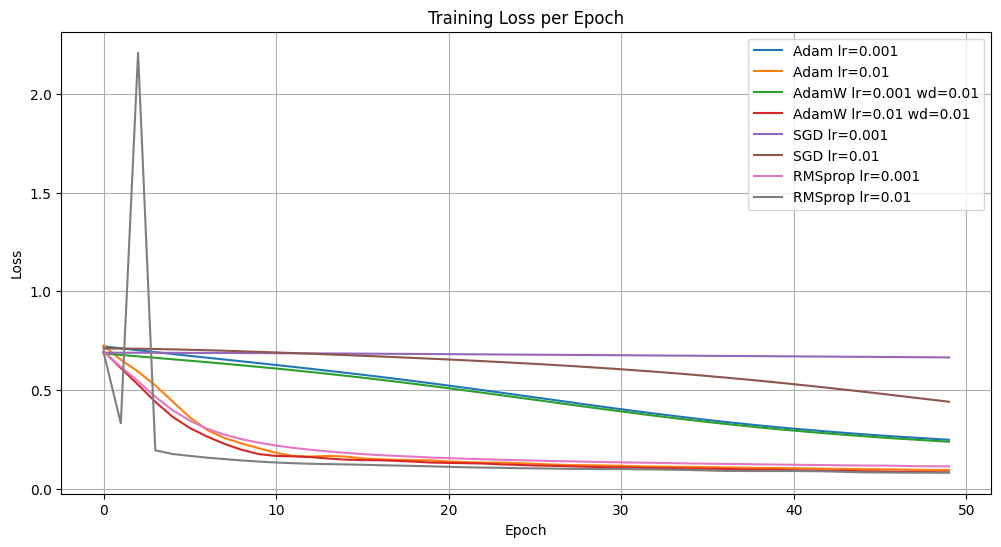


Best Model: AdamW lr=0.01 wd=0.01 (Accuracy: 0.9740), Inference Time: 0.054009 s


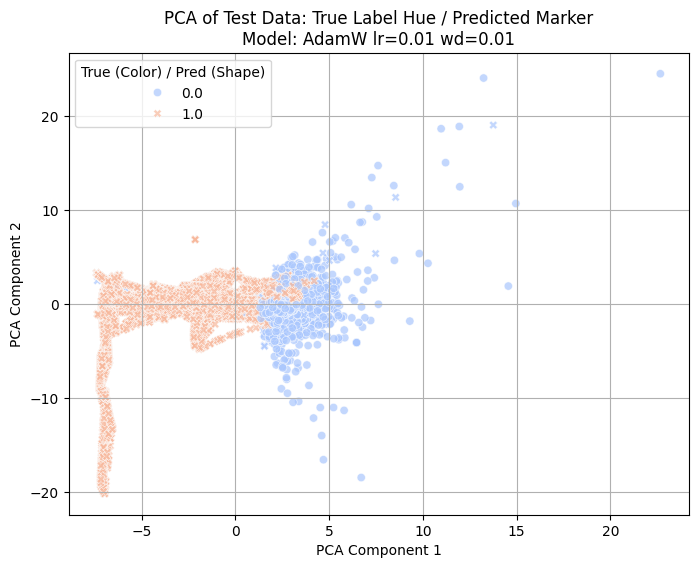

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA
import numpy as np
import time

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define MLP Model
class MLPModel(nn.Module):
    def __init__(self, input_dim):
        super(MLPModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        return torch.sigmoid(self.net(x))  # binary classification


# Training & Evaluation Function
def train_and_evaluate(config, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor):
    model = MLPModel(input_dim=X_train_tensor.shape[1])

    opt_name = config['optimizer'].lower()
    if opt_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=config['lr'], weight_decay=config['weight_decay'])
    elif opt_name == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=config['lr'], momentum=0.9, weight_decay=config['weight_decay'])
    elif opt_name == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=config['lr'], weight_decay=config['weight_decay'])
    elif opt_name == 'adamw':
        optimizer = optim.AdamW(model.parameters(), lr=config['lr'], weight_decay=config['weight_decay'])
    else:
        raise ValueError(f"Unknown optimizer: {config['optimizer']}")

    criterion = nn.BCELoss()
    losses = []

    for epoch in range(config['epochs']):
        model.train()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    # Evaluation
    model.eval()
    with torch.no_grad():
        start_time = time.time()
        y_pred_prob = model(X_test_tensor).numpy()
        end_time=time.time()
        inference_time = end_time-start_time
        y_pred = (y_pred_prob > 0.5).astype(int)

    y_true = y_test_tensor.numpy()
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_prob)

    print(f"\nResults for {config['name']}:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    print(f"Inference time:   {inference_time:.4f}")

    return model, losses, y_pred_prob, y_pred, accuracy, inference_time

hyperparameter_configs = [
    {'name': 'Adam lr=0.001', 'optimizer': 'Adam', 'lr': 0.001, 'weight_decay': 0.0, 'epochs': 50},
    {'name': 'Adam lr=0.01', 'optimizer': 'Adam', 'lr': 0.01, 'weight_decay': 0.0, 'epochs': 50},
    {'name': 'AdamW lr=0.001 wd=0.01', 'optimizer': 'AdamW', 'lr': 0.001, 'weight_decay': 0.01, 'epochs': 50},
    {'name': 'AdamW lr=0.01 wd=0.01', 'optimizer': 'AdamW', 'lr': 0.01, 'weight_decay': 0.01, 'epochs': 50},
    {'name': 'SGD lr=0.001', 'optimizer': 'SGD', 'lr': 0.001, 'weight_decay': 0.0, 'epochs': 50},
    {'name': 'SGD lr=0.01', 'optimizer': 'SGD', 'lr': 0.01, 'weight_decay': 0.0, 'epochs': 50},
    {'name': 'RMSprop lr=0.001', 'optimizer': 'RMSprop', 'lr': 0.001, 'weight_decay': 0.0, 'epochs': 50},
    {'name': 'RMSprop lr=0.01', 'optimizer': 'RMSprop', 'lr': 0.01, 'weight_decay': 0.0, 'epochs': 50},
]

# Train models
all_losses = []
config_names = []
predictions = []
accuracies = []
inference_times=[]
for config in hyperparameter_configs:
    print(f"\nTraining with configuration: {config['name']}")
    model, losses, y_pred_prob, y_pred, accuracy, inference_time = train_and_evaluate(config, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)
    all_losses.append(losses)
    config_names.append(config['name'])
    predictions.append((y_pred_prob, y_pred, config['name']))
    accuracies.append(accuracy)
    inference_times.append(inference_time)

plt.figure(figsize=(12, 6))
for i, losses in enumerate(all_losses):
    plt.plot(losses, label=config_names[i])
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

#Visualize Separation (PCA)
best_index = np.argmax(accuracies)  # Index of the highest accuracy
best_pred_prob, best_pred, best_name = predictions[best_index]
best_inference_time=inference_times[best_index]

print(f"\nBest Model: {best_name} (Accuracy: {accuracies[best_index]:.4f}), Inference Time: {best_inference_time:.6f} s")

# PCA for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_tensor.numpy())

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1],
                hue=y_test_tensor.numpy().flatten(),
                style=best_pred.flatten(),
                palette="coolwarm", alpha=0.7)
plt.title(f"PCA of Test Data: True Label Hue / Predicted Marker\nModel: {best_name}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="True (Color) / Pred (Shape)", loc="best")
plt.grid(True)
plt.show()


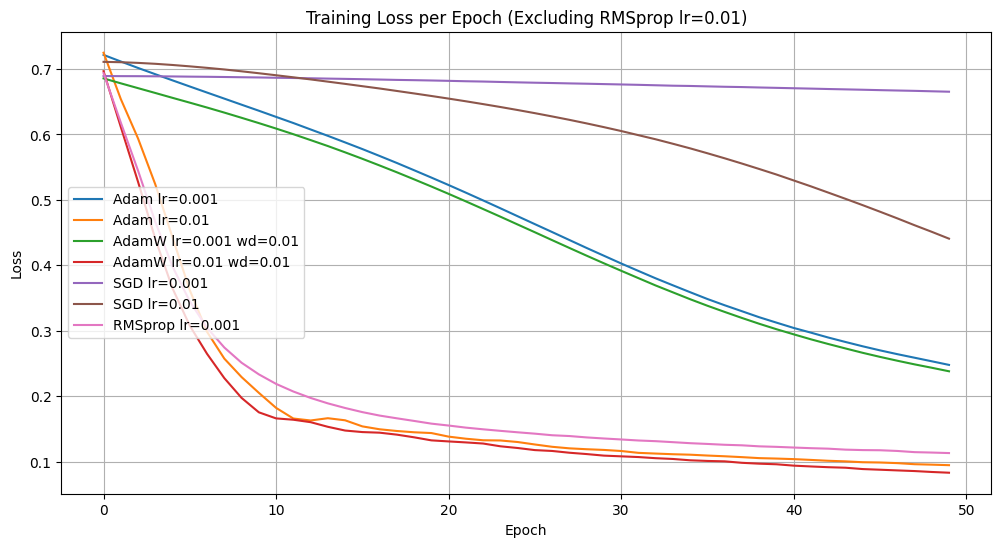

In [ ]:
plt.figure(figsize=(12, 6))

# Iterate through all configurations but skip RMSprop lr=0.01
for i, (losses, name) in enumerate(zip(all_losses, config_names)):
    if "RMSprop lr=0.01" in name:  # Skip RMSprop lr=0.01
        continue
    plt.plot(losses, label=name)

plt.title("Training Loss per Epoch (Excluding RMSprop lr=0.01)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

## SVM

Features being used: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Training on 10000 samples

=== Training Linear SVM ===
Completed in 1.60s

=== Training RBF SVM (C=1) ===
Completed in 1.19s

=== Training RBF SVM (C=10) ===
Completed in 1.01s

=== Training Poly SVM (deg=2) ===
Completed in 3.65s

=== Training Poly SVM (deg=3) ===
Completed in 0.93s


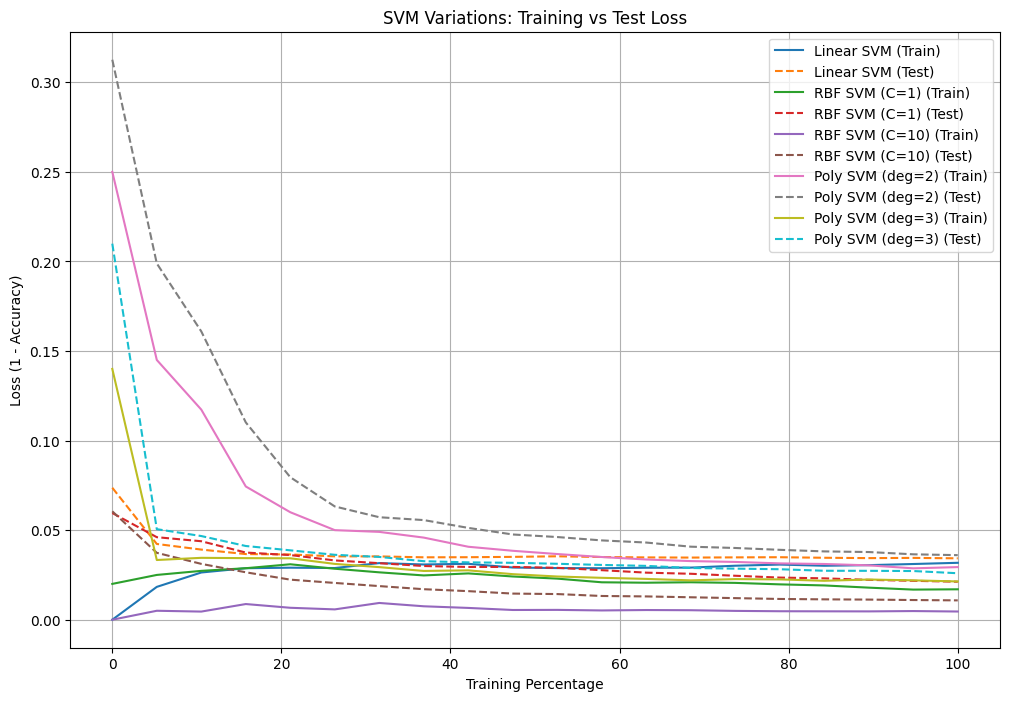


=== Performance Summary ===
              Model  Accuracy  Precision    Recall  F1-Score  Train Time (s)
0        Linear SVM  0.965786   0.979732  0.951251  0.965282        1.598238
1     RBF SVM (C=1)  0.979204   0.989439  0.968749  0.978985        1.190257
2    RBF SVM (C=10)  0.989519   0.990157  0.988868  0.989512        1.011094
3  Poly SVM (deg=2)  0.964476   0.960379  0.968925  0.964633        3.647417
4  Poly SVM (deg=3)  0.973973   0.990911  0.956721  0.973516        0.925380


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score)
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
import time
feature_names = [col for col in df.columns if col != 'Class']
print("Features being used:", feature_names)

X_train_res_short, y_train_res_short = X_train_res[:10000], y_train_res[:10000]
print(f"Training on {len(X_train_res_short)} samples")

# SVM variations to test
svm_variations = {
    'Linear SVM': {'kernel': 'linear', 'C': 1.0,},
    'RBF SVM (C=1)': {'kernel': 'rbf', 'C': 1.0, 'gamma': 'scale'},
    'RBF SVM (C=10)': {'kernel': 'rbf', 'C': 10.0, 'gamma': 'scale'},
    'Poly SVM (deg=2)': {'kernel': 'poly', 'degree': 2, 'C': 1.0},
    'Poly SVM (deg=3)': {'kernel': 'poly', 'degree': 3, 'C': 1.0},
}


# Get top feature names and indices
def get_top_features(model, X, y, feature_names, top_n=2):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    sorted_idx = result.importances_mean.argsort()[::-1]
    top_indices = sorted_idx[:top_n]
    top_feature_names = [feature_names[i] for i in top_indices]
    return top_indices, top_feature_names

# Train models and track losses
results = []
plt.figure(figsize=(12, 8))
for name, params in svm_variations.items():
    print(f"\n=== Training {name} ===")
    start_time = time.time()

    model = SVC(**params)
    model.fit(X_train_res_short, y_train_res_short)

    train_time = time.time() - start_time
    y_pred = model.predict(X_test)

    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Train Time (s)': train_time
    }
    results.append(metrics)

    print(f"Completed in {train_time:.2f}s")

    # Get loss (1 - accuracy) over iterations
    train_loss = []
    test_loss = []
    for i in range(1, 101, 5):
        partial_model = SVC(**params)
        partial_model.fit(X_train_res_short[:i*len(X_train_res_short)//100],
                         y_train_res_short[:i*len(y_train_res_short)//100])
        train_loss.append(1 - partial_model.score(
            X_train_res_short[:i*len(X_train_res_short)//100],
            y_train_res_short[:i*len(y_train_res_short)//100]))
        test_loss.append(1 - partial_model.score(X_test, y_test))

    plt.plot(np.linspace(0, 100, 20), train_loss, label=f'{name} (Train)')
    plt.plot(np.linspace(0, 100, 20), test_loss, '--', label=f'{name} (Test)')

plt.xlabel('Training Percentage')
plt.ylabel('Loss (1 - Accuracy)')
plt.title('SVM Variations: Training vs Test Loss')
plt.legend()
plt.grid()
plt.show()

# Metrics summary
results_df = pd.DataFrame(results)
print("\n=== Performance Summary ===")
print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Train Time (s)']])


Features being used: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

=== Training Linear SVM ===
Completed in 9.70s
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

Confusion Matrix:
[[55744  1119]
 [ 2772 54091]]

=== Training RBF SVM (C=1) ===
Completed in 3.61s
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56863
           1       0.99      0.97      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98 

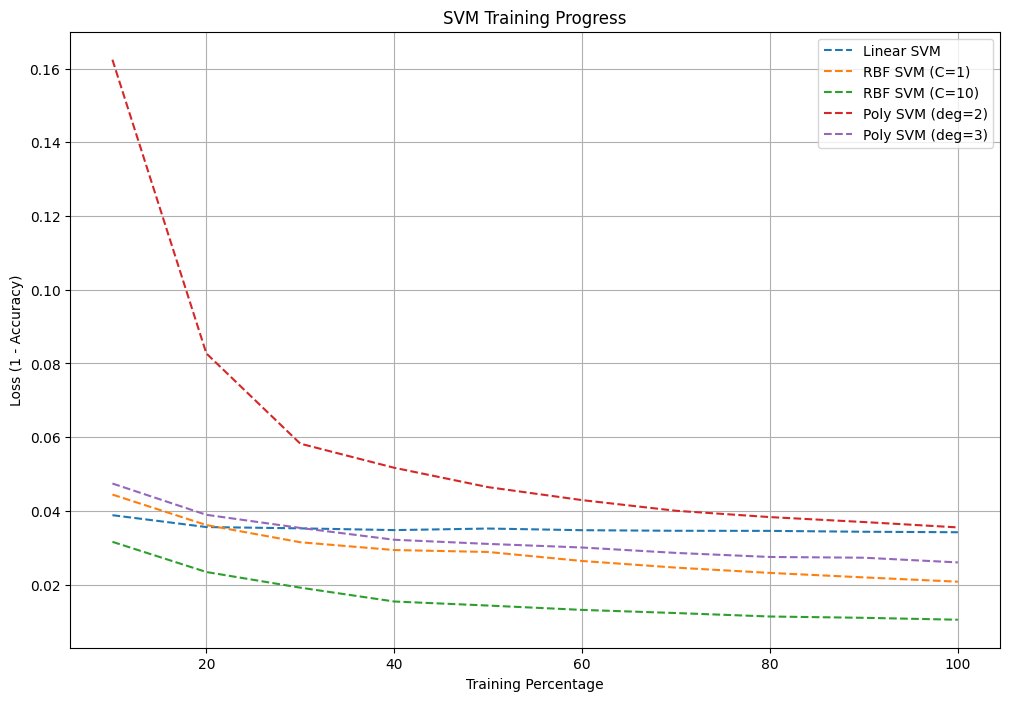


=== Performance Summary ===
              Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
0        Linear SVM  0.965786   0.979732  0.951251  0.965282  0.992797   
1     RBF SVM (C=1)  0.979204   0.989439  0.968749  0.978985  0.997016   
2    RBF SVM (C=10)  0.989519   0.990157  0.988868  0.989512  0.999190   
3  Poly SVM (deg=2)  0.964476   0.960379  0.968925  0.964633  0.988071   
4  Poly SVM (deg=3)  0.973973   0.990911  0.956721  0.973516  0.995104   

   Train Time (s)  
0        9.699790  
1        3.605614  
2        2.722630  
3       10.419577  
4        3.954575  

Top 2 features: ['V14', 'V12']


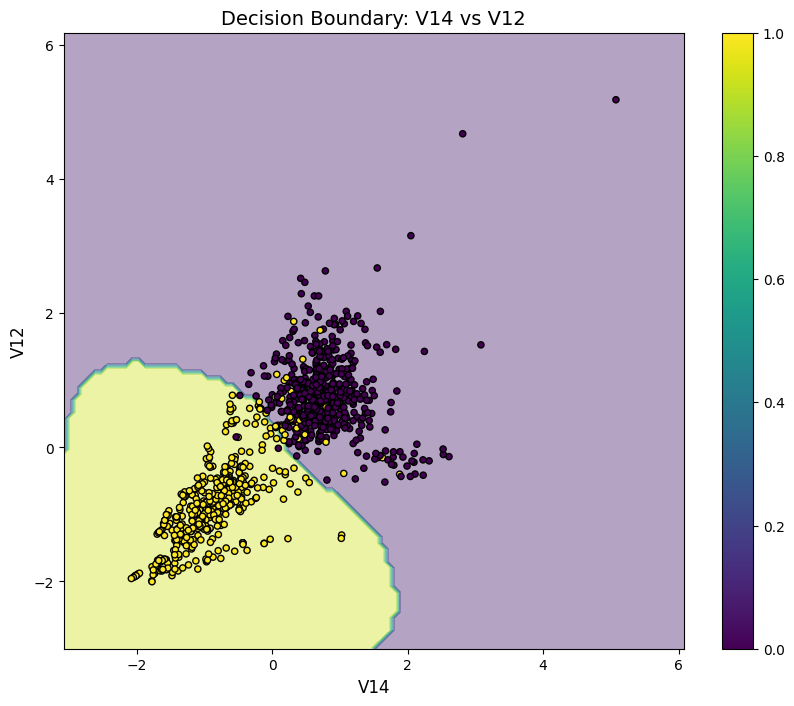

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report)
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
import time
feature_names = [col for col in df.columns if col != 'Class']
print("Features being used:", feature_names)
X_train_res, y_train_res = X_train_res[:10000], y_train_res[:10000]

# SVM variations with metrics
svm_variations = {
    'Linear SVM': {'kernel': 'linear', 'C': 1.0,},
    'RBF SVM (C=1)': {'kernel': 'rbf', 'C': 1.0, 'gamma': 'scale'},
    'RBF SVM (C=10)': {'kernel': 'rbf', 'C': 10.0, 'gamma': 'scale'},
    'Poly SVM (deg=2)': {'kernel': 'poly', 'degree': 2, 'C': 1.0},
    'Poly SVM (deg=3)': {'kernel': 'poly', 'degree': 3, 'C': 1.0},
}
results = []
plt.figure(figsize=(12, 8))
for name, params in svm_variations.items():
    print(f"\n=== Training {name} ===")
    start_time = time.time()

    model = SVC(**params, probability=True)  # Enable probability for ROC-AUC
    model.fit(X_train_res, y_train_res)
    train_time = time.time() - start_time

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    # Calculate metrics
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba),
        'Train Time (s)': train_time,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    results.append(metrics)

    # Print real-time progress
    print(f"Completed in {train_time:.2f}s")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])

    # Plot training progress (loss curve)
    train_loss = []
    test_loss = []
    for i in range(10, 101, 10):  # Coarser intervals for speed
        partial_model = SVC(**params)
        partial_model.fit(X_train_res[:i*len(X_train_res)//100],
                        y_train_res[:i*len(y_train_res)//100])
        train_loss.append(1 - partial_model.score(
            X_train_res[:i*len(X_train_res)//100],
            y_train_res[:i*len(y_train_res)//100]))
        test_loss.append(1 - partial_model.score(X_test, y_test))

    # plt.plot(np.linspace(10, 100, 10), train_loss, label=f'{name} (Train)')
    # plt.plot(np.linspace(10, 100, 10), test_loss, '--', label=f'{name} (Test)')
    plt.plot(np.linspace(10, 100, 10), test_loss, '--', label=f'{name}')

# Finalize plots
plt.xlabel('Training Percentage')
plt.ylabel('Loss (1 - Accuracy)')
plt.title('SVM Training Progress')
plt.legend()
plt.grid()
plt.show()

# Metrics summary
results_df = pd.DataFrame(results)
print("\n=== Performance Summary ===")
print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Train Time (s)']])

# Feature importance and visualization
best_model = SVC(kernel='rbf', C=10.0, gamma='scale', probability=True)
best_model.fit(X_train_res, y_train_res)

# Get permutation importance correctly
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=5, random_state=42)

# Extract top 2 features
sorted_idx = result.importances_mean.argsort()[::-1]  # Sort descending
top_indices = sorted_idx[:2]
top_feature_names = [feature_names[i] for i in top_indices]
print(f"\nTop 2 features: {top_feature_names}")

# Convert to numpy array for proper indexing
X_train_res_np = np.array(X_train_res)
y_train_res_np = np.array(y_train_res)

# Decision boundary plot
def plot_decision_boundary(model, X, y, feature_names):
    plt.figure(figsize=(10, 8))
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel(feature_names[0], fontsize=12)
    plt.ylabel(feature_names[1], fontsize=12)
    plt.title(f'Decision Boundary: {feature_names[0]} vs {feature_names[1]}', fontsize=14)
    plt.colorbar()
    plt.show()

# Visualize top 2 features (using first 1000 samples for clarity)
X_top2 = X_train_res_np[:1000, top_indices]  # Now using proper numpy indexing
y_top2 = y_train_res_np[:1000]
viz_model = SVC(kernel='rbf', C=10.0, gamma='scale')
viz_model.fit(X_top2, y_top2)
plot_decision_boundary(viz_model, X_top2, y_top2, top_feature_names)

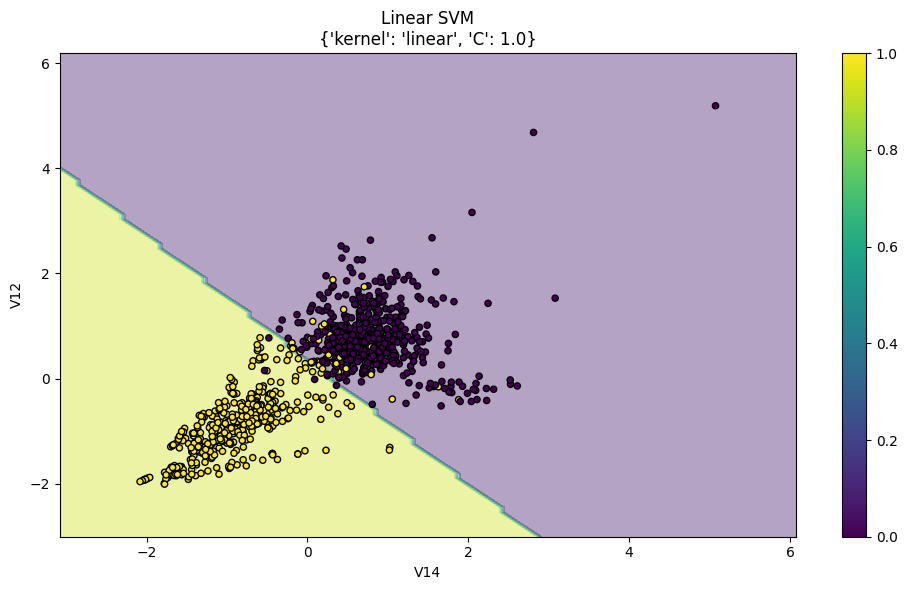

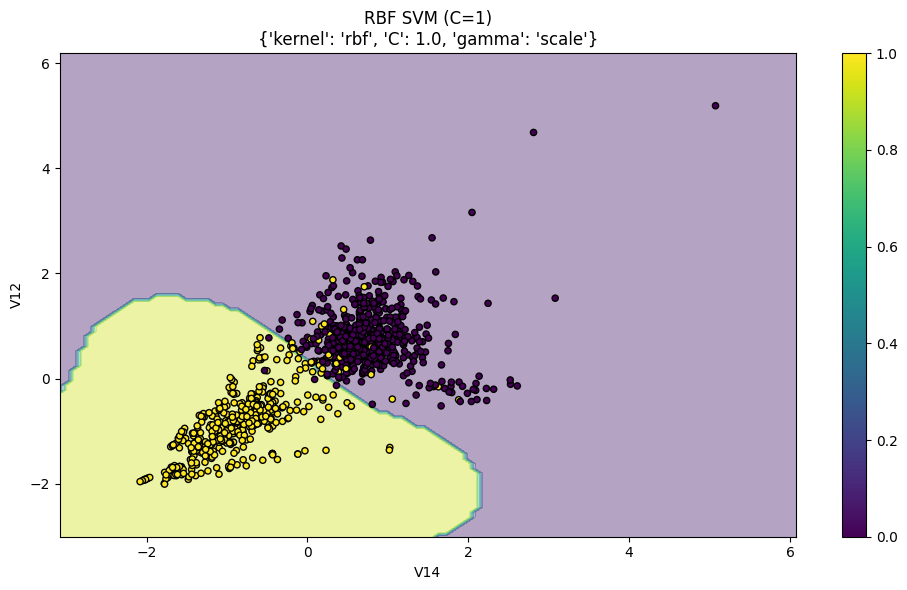

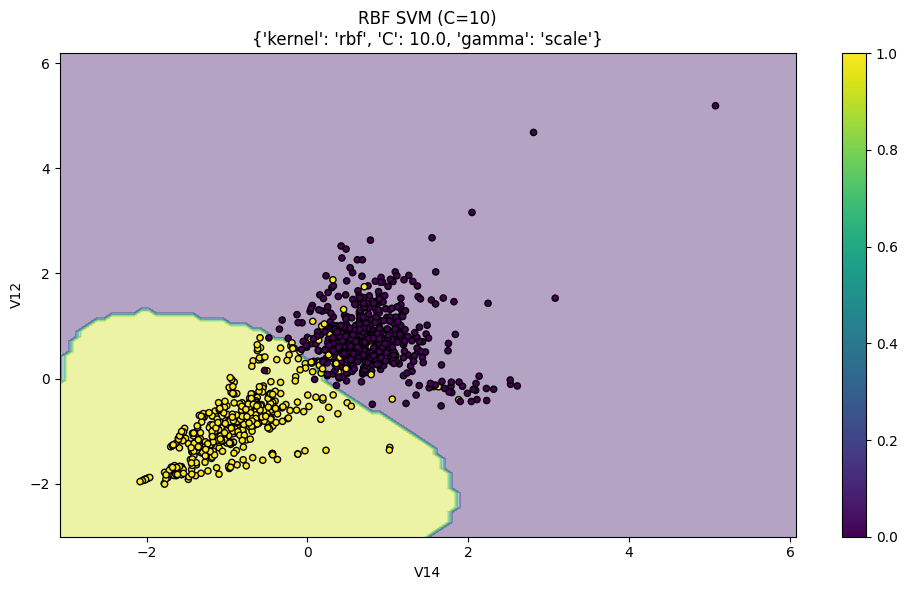

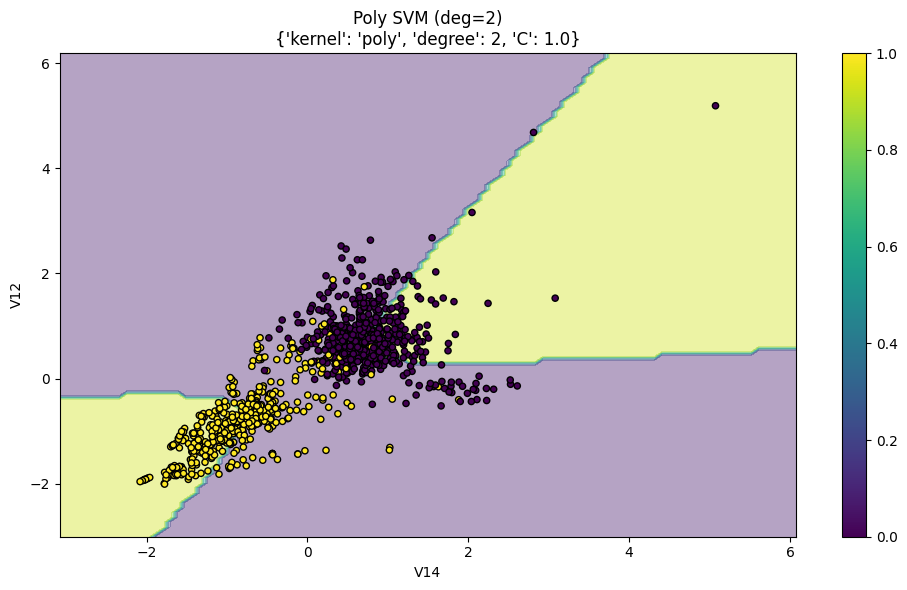

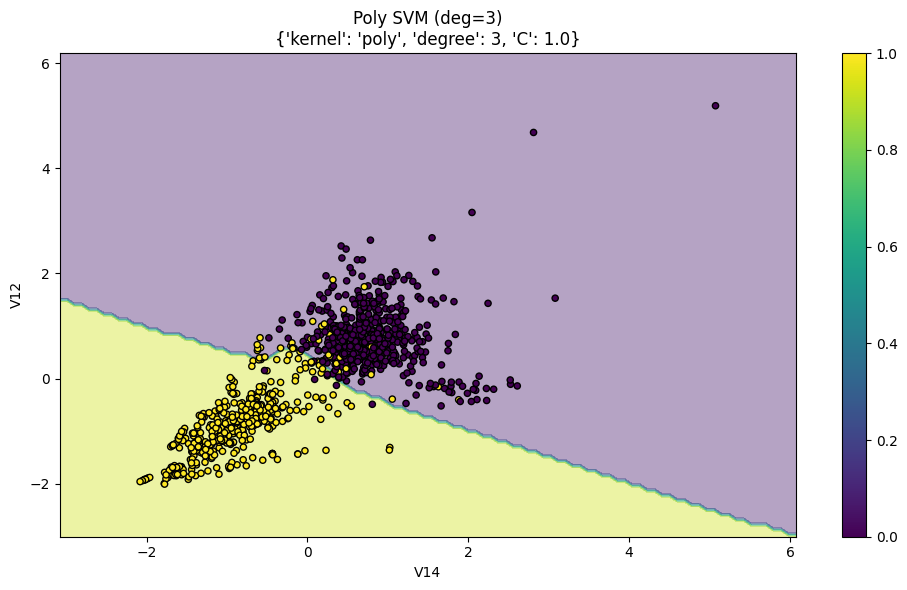

In [32]:
# Plot each SVM's decision boundary
for idx, (name, params) in enumerate(svm_variations.items()):
    plt.figure(figsize=(10,6))

    # Train model on top 2 features
    model = SVC(**params)
    X_top2 = X_train_res_np[:1000, top_indices]
    y_top2 = y_train_res_np[:1000]
    model.fit(X_top2, y_top2)

    # mesh grid
    x_min, x_max = X_top2[:, 0].min()-1, X_top2[:, 0].max()+1
    y_min, y_max = X_top2[:, 1].min()-1, X_top2[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict and plot
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X_top2[:, 0], X_top2[:, 1], c=y_top2, s=20, edgecolor='k')

    plt.xlabel(top_feature_names[0])
    plt.ylabel(top_feature_names[1])
    plt.title(f'{name}\n{params}')
    plt.colorbar()
    plt.tight_layout()
    plt.show()
